Route: Goal 2 -> 2.3 GAM  
Purpose: to do GAM (Nature Splines) on processed data, struct the label that is close to the real-world situation, and to calculate the weight gathered by GAM  
Kernel: R

In [1]:
library(ggplot2)
library(data.table)
library(nlme)
library(mgcv)
bike = read.csv(sprintf('%s/DataSet/bike_pca.csv', getwd()), stringsAsFactors = FALSE)
bike <- data.table(bike)
bike$X <- NULL
bike

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.



X0,X1,days_since_2011,holiday_HOLIDAY,weekday_SUN,weekday_MON,weekday_TUE,weekday_WED,weekday_THU,weekday_FRI,weekday_SAT,weathersit_GOOD,weathersit_MISTY,weathersit_BAD,cnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-1.15828547,0.6097238,-1.729683,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,2.4417012,-1.3143865,1.3998265,-0.171981,985
0.19126442,0.8688325,-1.724944,-0.171981,2.4417012,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,-1.3143865,1.3998265,-0.171981,801
1.47495816,-0.4190613,-1.720205,-0.171981,-0.4095505,2.4417012,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1349
-0.08955295,-0.4617479,-1.715466,-0.171981,-0.4095505,-0.4095505,2.4553709,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1562
0.91583586,-0.9813234,-1.710728,-0.171981,-0.4095505,-0.4095505,-0.4072704,2.4553709,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1600
-0.37679539,-1.4661144,-1.705989,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,2.4553709,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1606
0.44317821,-0.8405395,-1.701250,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,2.4553709,-0.4095505,-1.3143865,1.3998265,-0.171981,1510
1.15417767,0.2394548,-1.696511,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,2.4417012,-1.3143865,1.3998265,-0.171981,959
2.52798304,0.6031023,-1.691772,-0.171981,2.4417012,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,822


# 2.3.1 Ideas for structing data close to real situations using GAM  (Natural Splines)

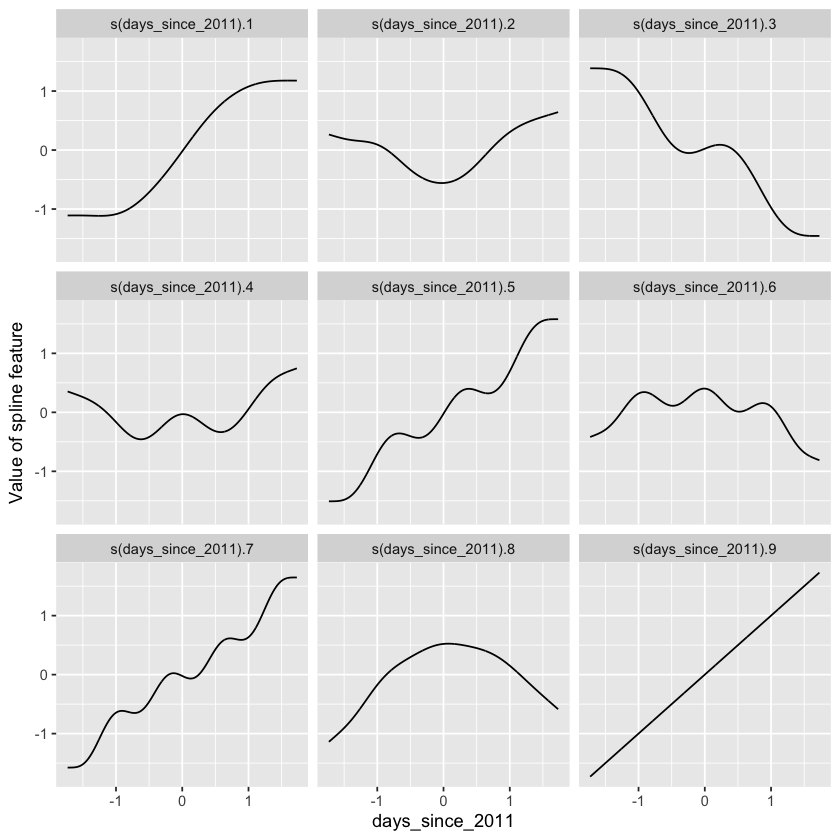

In [2]:
mod.gam = gam(cnt ~ s(days_since_2011), data = bike)
mm = model.matrix(mod.gam)
mm <- data.table(mm)
mm2 = data.table::melt(mm, measure.vars = c("(Intercept)", "s(days_since_2011).1", "s(days_since_2011).2", "s(days_since_2011).3", "s(days_since_2011).4", "s(days_since_2011).5", "s(days_since_2011).6", "s(days_since_2011).7", "s(days_since_2011).8", "s(days_since_2011).9"), variable.name = "Var2", value.name = "value")

mm2 = mm2[mm2$Var2 != "(Intercept)",]

ggplot(mm2) + geom_line(aes(x = rep(bike$days_since_2011, times = 9), y = value)) + facet_wrap("Var2") + 
  scale_x_continuous("days_since_2011") + 
  scale_y_continuous("Value of spline feature")

In [3]:
knitr::kable(coef(mod.gam), digits = 2, col.names = "weight")



|                     |   weight|
|:--------------------|--------:|
|(Intercept)          |  4504.35|
|s(days_since_2011).1 |  1925.59|
|s(days_since_2011).2 | 14980.69|
|s(days_since_2011).3 |   648.95|
|s(days_since_2011).4 |  4412.50|
|s(days_since_2011).5 |  -139.28|
|s(days_since_2011).6 | -6655.85|
|s(days_since_2011).7 |   209.36|
|s(days_since_2011).8 | 18607.74|
|s(days_since_2011).9 | -6257.78|

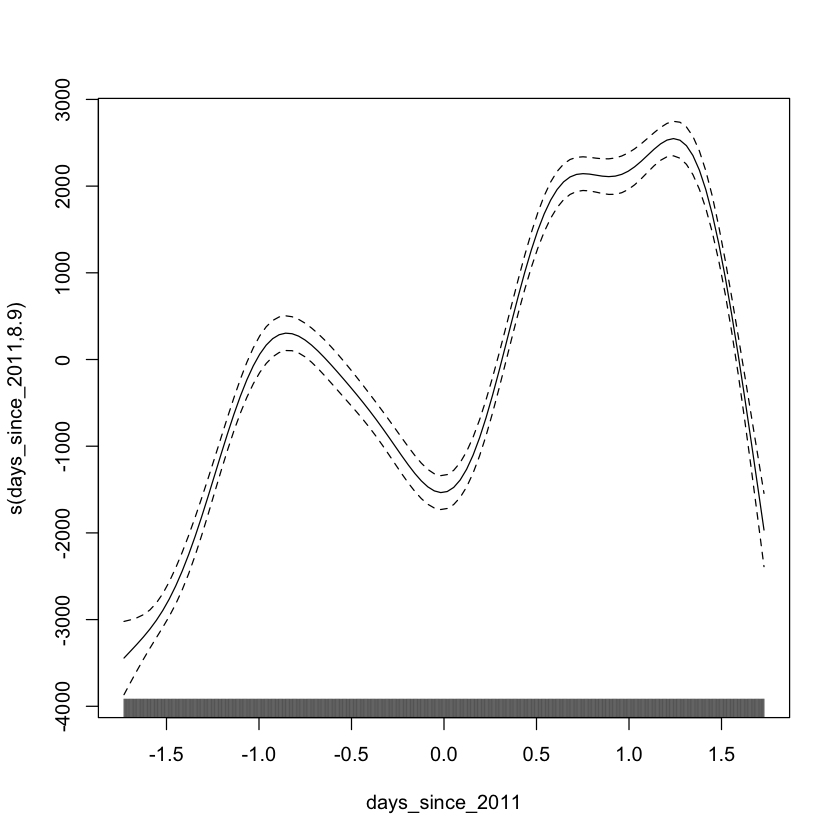

In [4]:
plot(mod.gam)

# 2.3.2 GAM for PCA Variables(X0 and X1)

## 2.3.2.1 X0

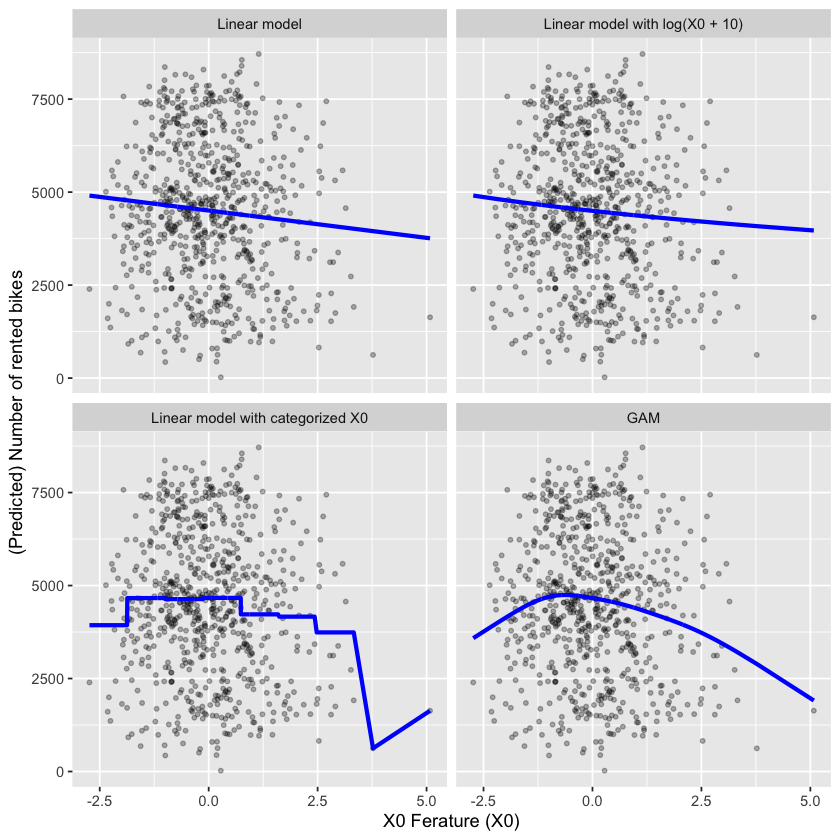

In [5]:
mod.simpel = lm(cnt ~ X0, data = bike)
bike.plt = bike

bike.plt$pred.lm = predict(mod.simpel)

bike.plt$log.X0 = log(bike$X0 + 10)
mod.simpel = lm(cnt ~ log.X0, data = bike.plt)
bike.plt$pred.sqrt = predict(mod.simpel)

bike.plt$cat.X0 = cut(bike$X0, breaks = seq(from = min(bike$X0), to = max(bike$X0), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.X0, data = bike.plt)
bike.plt$pred.cat = predict(mod.simpel)

mod.gam = gam(cnt ~ s(X0), data = bike)
bike.plt$pred.gam = predict(mod.gam)

a = bike.plt[, c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), with=FALSE]
bike.plt = data.table::melt(a, measure.vars = c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), variable.name = "variable", value.name = "value")
bike.plt$X0 = rep(bike$X0, times = 4)
bike.plt$cnt = rep(bike$cnt, times = 4)

model.type = c(pred.lm = "Linear model", 
  pred.sqrt = "Linear model with log(X0 + 10)", 
  pred.cat = "Linear model with categorized X0", 
  pred.gam = "GAM")

print(ggplot(bike.plt) + 
  geom_point(aes(x = X0, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = X0, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("X0 Ferature (X0)") + 
  scale_y_continuous("(Predicted) Number of rented bikes"))

In [6]:
newd = bike[,'X0']
Xp <- predict(mod.gam, newd, type="lpmatrix")
coef_ <- coef(mod.gam)
coef_ <- data.table(coef_)
Weight_X0 = vector()
for(j in 1:length(Xp[,2])){
    Weight_local_X0 = 0
        for(i in 1:(length(Xp[2,])-1)){
        Weight_local_X0 = Weight_local_X0 + Xp[j,i+1]*coef_[i+1,1]
    }
    Weight_X0 = c(Weight_X0, Weight_local_X0)
}

Weight_X0 = data.frame(Weight_X0)
Weight_X0

coef_,coef_.1,coef_.2,coef_.3,coef_.4,coef_.5,coef_.6,coef_.7,coef_.8,coef_.9,⋯,coef_.721,coef_.722,coef_.723,coef_.724,coef_.725,coef_.726,coef_.727,coef_.728,coef_.729,coef_.730
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
137.1723,118.5591,-299.5668,176.1677,-85.68104,223.5188,59.11074,-173.6891,-789.5183,-123.1235,⋯,-1017.5,151.6058,-263.5799,237.5988,121.0079,-243.2795,184.0615,109.1911,-607.4193,173.3847


## 2.3.2.2 X1

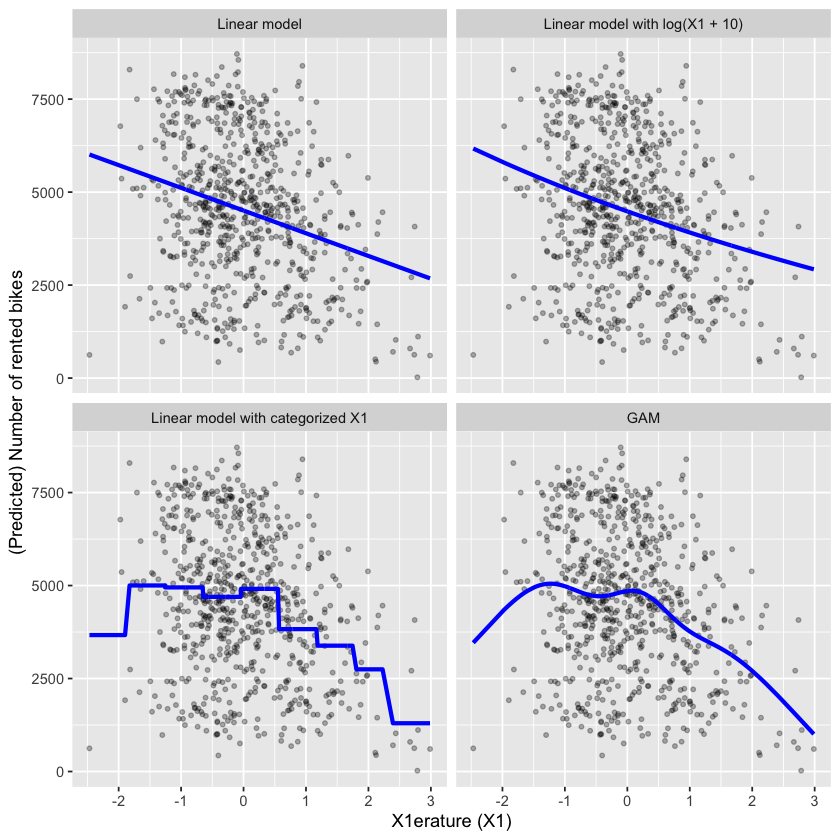

In [7]:
mod.simpel = lm(cnt ~ X1, data = bike)
bike.plt = bike

bike.plt$pred.lm = predict(mod.simpel)

bike.plt$log.X1 = log(bike$X1 + 10)
mod.simpel = lm(cnt ~ log.X1, data = bike.plt)
bike.plt$pred.sqrt = predict(mod.simpel)

bike.plt$cat.X1 = cut(bike$X1, breaks = seq(from = min(bike$X1), to = max(bike$X1), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.X1, data = bike.plt)
bike.plt$pred.cat = predict(mod.simpel)

mod.gam = gam(cnt ~ s(X1), data = bike)
bike.plt$pred.gam = predict(mod.gam)

a = bike.plt[, c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), with=FALSE]
bike.plt = data.table::melt(a, measure.vars = c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), variable.name = "variable", value.name = "value")
bike.plt$X1 = rep(bike$X1, times = 4)
bike.plt$cnt = rep(bike$cnt, times = 4)

model.type = c(pred.lm = "Linear model", 
  pred.sqrt = "Linear model with log(X1 + 10)", 
  pred.cat = "Linear model with categorized X1", 
  pred.gam = "GAM")

print(ggplot(bike.plt) + 
  geom_point(aes(x = X1, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = X1, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("X1erature (X1)") + 
  scale_y_continuous("(Predicted) Number of rented bikes"))


In [8]:
newd = bike[,'X1']
Xp <- predict(mod.gam, newd, type="lpmatrix")
coef_ <- coef(mod.gam)
coef_ <- data.table(coef_)
Weight_X1 = vector()
for(j in 1:length(Xp[,2])){
    Weight_local_X1 = 0
        for(i in 1:(length(Xp[2,])-1)){
        Weight_local_X1 = Weight_local_X1 + Xp[j,i+1]*coef_[i+1,1]
    }
    Weight_X1 = c(Weight_X1, Weight_local_X1)
}

Weight_X1 = data.frame(Weight_X1)
Weight_X1


coef_,coef_.1,coef_.2,coef_.3,coef_.4,coef_.5,coef_.6,coef_.7,coef_.8,coef_.9,⋯,coef_.721,coef_.722,coef_.723,coef_.724,coef_.725,coef_.726,coef_.727,coef_.728,coef_.729,coef_.730
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-175.7436,-575.2868,208.1014,207.8306,466.3005,465.3952,376.5143,300.041,-164.9577,207.9912,⋯,-795.2703,515.5675,261.6373,219.1357,-1986.218,-1278.374,212.8099,350.8175,-393.8139,229.7939


# 2.3.3 GAM for NONE-PCA Variables

## 2.3.3.1 days_since_2011

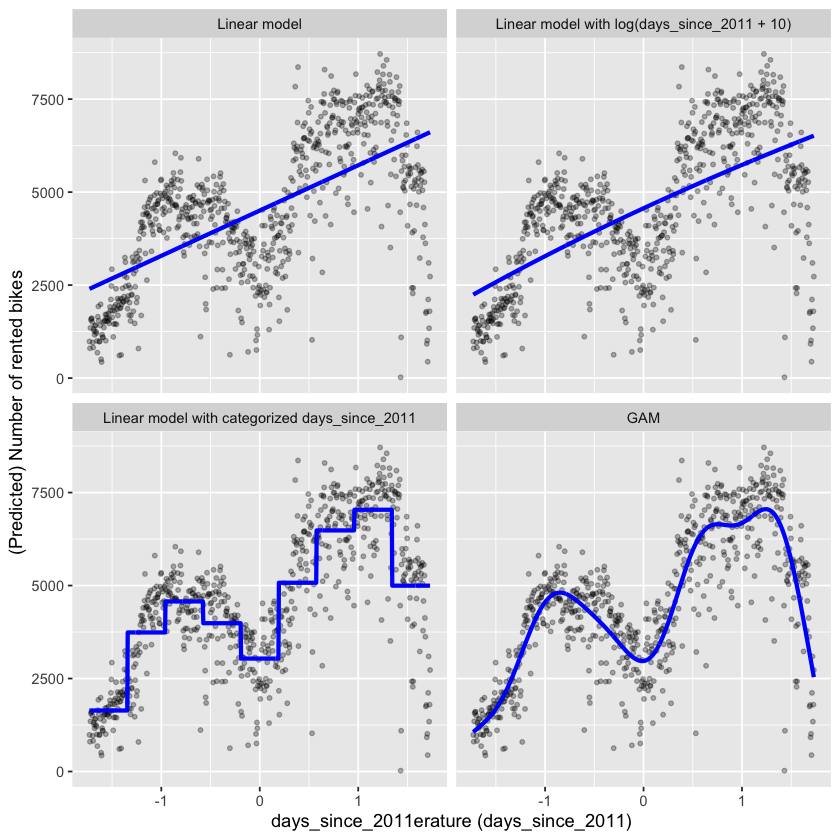

In [9]:
mod.simpel = lm(cnt ~ days_since_2011, data = bike)
bike.plt = bike

bike.plt$pred.lm = predict(mod.simpel)

bike.plt$log.days_since_2011 = log(bike$days_since_2011 + 10)
mod.simpel = lm(cnt ~ log.days_since_2011, data = bike.plt)
bike.plt$pred.sqrt = predict(mod.simpel)

bike.plt$cat.days_since_2011 = cut(bike$days_since_2011, breaks = seq(from = min(bike$days_since_2011), to = max(bike$days_since_2011), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.days_since_2011, data = bike.plt)
bike.plt$pred.cat = predict(mod.simpel)

mod.gam = gam(cnt ~ s(days_since_2011), data = bike)
bike.plt$pred.gam = predict(mod.gam)

a = bike.plt[, c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), with=FALSE]
bike.plt = data.table::melt(a, measure.vars = c("pred.lm", "pred.sqrt", "pred.cat", "pred.gam"), variable.name = "variable", value.name = "value")
bike.plt$days_since_2011 = rep(bike$days_since_2011, times = 4)
bike.plt$cnt = rep(bike$cnt, times = 4)

model.type = c(pred.lm = "Linear model", 
  pred.sqrt = "Linear model with log(days_since_2011 + 10)", 
  pred.cat = "Linear model with categorized days_since_2011", 
  pred.gam = "GAM")

print(ggplot(bike.plt) + 
  geom_point(aes(x = days_since_2011, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = days_since_2011, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("days_since_2011erature (days_since_2011)") + 
  scale_y_continuous("(Predicted) Number of rented bikes"))

In [10]:
newd = bike[,'days_since_2011']
Xp <- predict(mod.gam, newd, type="lpmatrix")
coef_ <- coef(mod.gam)
coef_ <- data.table(coef_)
Weight_days_since_2011 = vector()
for(j in 1:length(Xp[,2])){
    Weight_local_days_since_2011 = 0
        for(i in 1:(length(Xp[2,])-1)){
        Weight_local_days_since_2011 = Weight_local_days_since_2011 + Xp[j,i+1]*coef_[i+1,1]
    }
    Weight_days_since_2011 = c(Weight_days_since_2011, Weight_local_days_since_2011)
}

Weight_days_since_2011 = data.frame(Weight_days_since_2011)
Weight_days_since_2011


coef_,coef_.1,coef_.2,coef_.3,coef_.4,coef_.5,coef_.6,coef_.7,coef_.8,coef_.9,⋯,coef_.721,coef_.722,coef_.723,coef_.724,coef_.725,coef_.726,coef_.727,coef_.728,coef_.729,coef_.730
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-3443.517,-3432.812,-3422.107,-3411.399,-3400.688,-3389.97,-3379.243,-3368.502,-3357.745,-3346.966,⋯,-1336.988,-1406.828,-1476.719,-1546.65,-1616.611,-1686.595,-1756.593,-1826.6,-1896.612,-1966.626


## 2.3.3.2 holiday_HOLIDAY

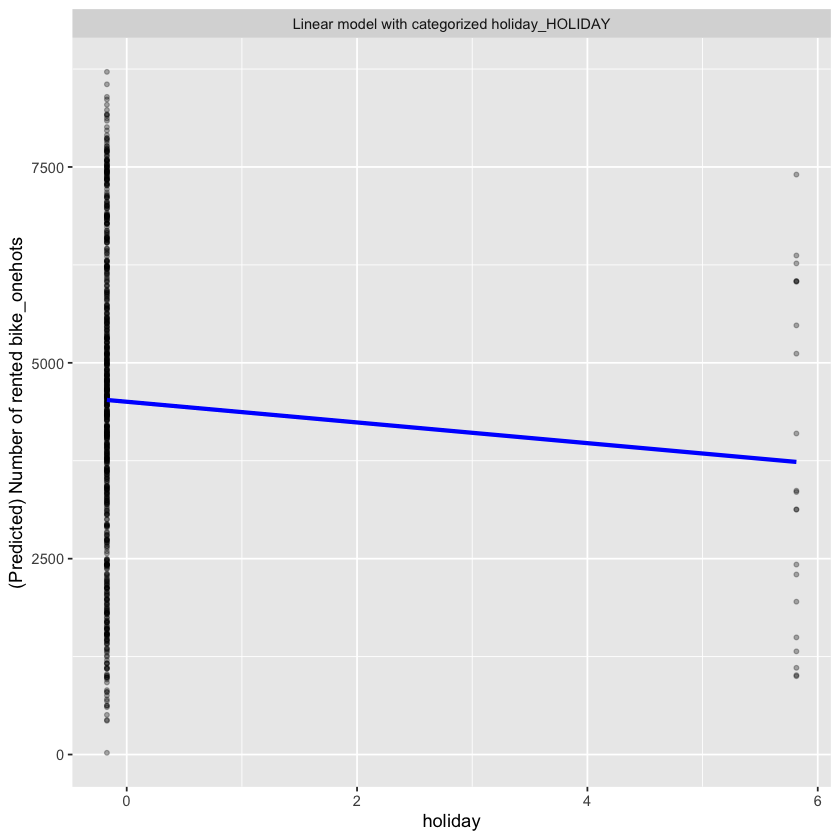

In [11]:
bike_onehot = bike
bike_onehot.plt = bike_onehot

bike_onehot.plt$cat.holiday_HOLIDAY = cut(bike_onehot$holiday_HOLIDAY, breaks = seq(from = min(bike_onehot$holiday_HOLIDAY), to = max(bike_onehot$holiday_HOLIDAY), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.holiday_HOLIDAY, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.holiday_HOLIDAY = predict(mod.simpel)

a = bike_onehot.plt[, c("pred.cat.holiday_HOLIDAY"), with=FALSE]
bike_onehot.plt = data.table::melt(a, measure.vars = c("pred.cat.holiday_HOLIDAY"), variable.name = "variable", value.name = "value")
bike_onehot.plt$holiday_HOLIDAY = bike_onehot$holiday_HOLIDAY
bike_onehot.plt$cnt = rep(bike_onehot$cnt, times = 1)

model.type = c(
    pred.cat.holiday_HOLIDAY = "Linear model with categorized holiday_HOLIDAY"
)

print(ggplot(bike_onehot.plt) + 
  geom_point(aes(x = holiday_HOLIDAY, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = holiday_HOLIDAY, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("holiday") + 
  scale_y_continuous("(Predicted) Number of rented bike_onehots"))


In [12]:
bike_onehot.plt = bike_onehot

newd = bike_onehot[,'holiday_HOLIDAY']
bike_onehot.plt$cat.holiday_HOLIDAY = cut(bike_onehot$holiday_HOLIDAY, breaks = seq(from = min(bike_onehot$holiday_HOLIDAY), to = max(bike_onehot$holiday_HOLIDAY), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.holiday_HOLIDAY, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_holiday_HOLIDAY = vector()
for(j in 1:length(Xp)){
    Weight_local_holiday_HOLIDAY = Xp[j] - mean(bike_onehot$cnt)
    Weight_holiday_HOLIDAY = c(Weight_holiday_HOLIDAY, Weight_local_holiday_HOLIDAY)
}

Weight_holiday_HOLIDAY = data.frame(Weight_holiday_HOLIDAY)
Weight_holiday_HOLIDAY

,Weight_holiday_HOLIDAY
,<dbl>
1,22.75539
2,22.75539
3,22.75539
4,22.75539
5,22.75539
6,22.75539
7,22.75539
8,22.75539
9,22.75539


## 2.3.3.3 Weekday(7)

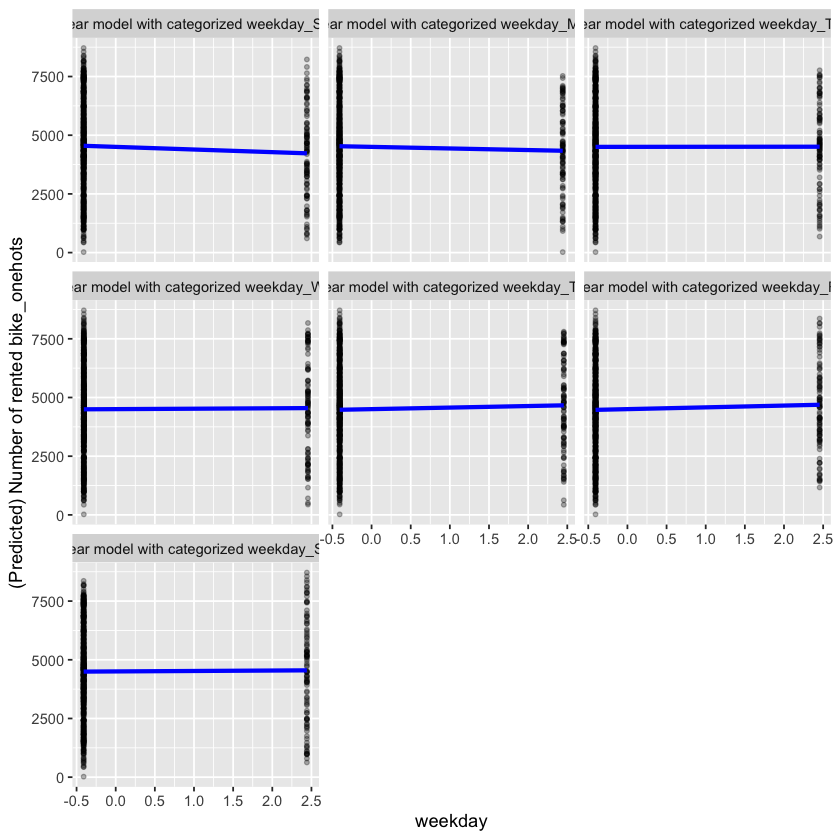

In [13]:
bike_onehot.plt = bike_onehot

bike_onehot.plt$cat.weekday_SUN = cut(bike_onehot$weekday_SUN, breaks = seq(from = min(bike_onehot$weekday_SUN), to = max(bike_onehot$weekday_SUN), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_SUN, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_SUN = predict(mod.simpel)
bike_onehot.plt$cat.weekday_MON = cut(bike_onehot$weekday_MON, breaks = seq(from = min(bike_onehot$weekday_MON), to = max(bike_onehot$weekday_MON), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_MON, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_MON = predict(mod.simpel)
bike_onehot.plt$cat.weekday_TUE = cut(bike_onehot$weekday_TUE, breaks = seq(from = min(bike_onehot$weekday_TUE), to = max(bike_onehot$weekday_TUE), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_TUE, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_TUE = predict(mod.simpel)
bike_onehot.plt$cat.weekday_WED = cut(bike_onehot$weekday_WED, breaks = seq(from = min(bike_onehot$weekday_WED), to = max(bike_onehot$weekday_WED), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_WED, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_WED = predict(mod.simpel)
bike_onehot.plt$cat.weekday_THU = cut(bike_onehot$weekday_THU, breaks = seq(from = min(bike_onehot$weekday_THU), to = max(bike_onehot$weekday_THU), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_THU, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_THU = predict(mod.simpel)
bike_onehot.plt$cat.weekday_FRI = cut(bike_onehot$weekday_FRI, breaks = seq(from = min(bike_onehot$weekday_FRI), to = max(bike_onehot$weekday_FRI), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_FRI, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_FRI = predict(mod.simpel)
bike_onehot.plt$cat.weekday_SAT = cut(bike_onehot$weekday_SAT, breaks = seq(from = min(bike_onehot$weekday_SAT), to = max(bike_onehot$weekday_SAT), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_SAT, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weekday_SAT = predict(mod.simpel)

a = bike_onehot.plt[, c("pred.cat.weekday_SUN", "pred.cat.weekday_MON", "pred.cat.weekday_TUE", "pred.cat.weekday_WED", "pred.cat.weekday_THU", "pred.cat.weekday_FRI", "pred.cat.weekday_SAT"), with=FALSE]
bike_onehot.plt = data.table::melt(a, measure.vars = c("pred.cat.weekday_SUN", "pred.cat.weekday_MON", "pred.cat.weekday_TUE", "pred.cat.weekday_WED", "pred.cat.weekday_THU", "pred.cat.weekday_FRI", "pred.cat.weekday_SAT"), variable.name = "variable", value.name = "value")
v_season_SPRING = vector()
v_season_SPRING = c(v_season_SPRING, bike_onehot$weekday_SUN, bike_onehot$weekday_MON, bike_onehot$weekday_TUE, bike_onehot$weekday_WED, bike_onehot$weekday_THU, bike_onehot$weekday_FRI, bike_onehot$weekday_SAT)
bike_onehot.plt$season_SPRING = v_season_SPRING
bike_onehot.plt$cnt = rep(bike_onehot$cnt, times = 7)

model.type = c(
    pred.cat.weekday_SUN = "Linear model with categorized weekday_SUN",
    pred.cat.weekday_MON = "Linear model with categorized weekday_MON",
    pred.cat.weekday_TUE = "Linear model with categorized weekday_TUE",
    pred.cat.weekday_WED = "Linear model with categorized weekday_WED",
    pred.cat.weekday_THU = "Linear model with categorized weekday_THU",
    pred.cat.weekday_FRI = "Linear model with categorized weekday_FRI",
    pred.cat.weekday_SAT = "Linear model with categorized weekday_SAT"
)

print(ggplot(bike_onehot.plt) + 
  geom_point(aes(x = season_SPRING, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = season_SPRING, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("weekday") + 
  scale_y_continuous("(Predicted) Number of rented bike_onehots"))


In [14]:
bike_onehot.plt = bike_onehot

newd = bike_onehot[,'weekday_SUN']
bike_onehot.plt$cat.weekday_SUN = cut(bike_onehot$weekday_SUN, breaks = seq(from = min(bike_onehot$weekday_SUN), to = max(bike_onehot$weekday_SUN), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_SUN, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_SUN = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_SUN = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_SUN = c(Weight_weekday_SUN, Weight_local_weekday_SUN)
}

newd = bike_onehot[,'weekday_MON']
bike_onehot.plt$cat.weekday_MON = cut(bike_onehot$weekday_MON, breaks = seq(from = min(bike_onehot$weekday_MON), to = max(bike_onehot$weekday_MON), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_MON, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_MON = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_MON = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_MON = c(Weight_weekday_MON, Weight_local_weekday_MON)
}

newd = bike_onehot[,'weekday_TUE']
bike_onehot.plt$cat.weekday_TUE = cut(bike_onehot$weekday_TUE, breaks = seq(from = min(bike_onehot$weekday_TUE), to = max(bike_onehot$weekday_TUE), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_TUE, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_TUE = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_TUE = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_TUE = c(Weight_weekday_TUE, Weight_local_weekday_TUE)
}

newd = bike_onehot[,'weekday_WED']
bike_onehot.plt$cat.weekday_WED = cut(bike_onehot$weekday_WED, breaks = seq(from = min(bike_onehot$weekday_WED), to = max(bike_onehot$weekday_WED), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_WED, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_WED = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_WED = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_WED = c(Weight_weekday_WED, Weight_local_weekday_WED)
}

newd = bike_onehot[,'weekday_THU']
bike_onehot.plt$cat.weekday_THU = cut(bike_onehot$weekday_THU, breaks = seq(from = min(bike_onehot$weekday_THU), to = max(bike_onehot$weekday_THU), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_THU, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_THU = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_THU = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_THU = c(Weight_weekday_THU, Weight_local_weekday_THU)
}

newd = bike_onehot[,'weekday_FRI']
bike_onehot.plt$cat.weekday_FRI = cut(bike_onehot$weekday_FRI, breaks = seq(from = min(bike_onehot$weekday_FRI), to = max(bike_onehot$weekday_FRI), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_FRI, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_FRI = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_FRI = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_FRI = c(Weight_weekday_FRI, Weight_local_weekday_FRI)
}

newd = bike_onehot[,'weekday_SAT']
bike_onehot.plt$cat.weekday_SAT = cut(bike_onehot$weekday_SAT, breaks = seq(from = min(bike_onehot$weekday_SAT), to = max(bike_onehot$weekday_SAT), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weekday_SAT, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weekday_SAT = vector()
for(j in 1:length(Xp)){
    Weight_local_weekday_SAT = Xp[j] - mean(bike_onehot$cnt)
    Weight_weekday_SAT = c(Weight_weekday_SAT, Weight_local_weekday_SAT)
}

Weight_weekday_SUN = data.frame(Weight_weekday_SUN)
Weight_weekday_MON = data.frame(Weight_weekday_MON)
Weight_weekday_TUE = data.frame(Weight_weekday_TUE)
Weight_weekday_WED = data.frame(Weight_weekday_WED)
Weight_weekday_THU = data.frame(Weight_weekday_THU)
Weight_weekday_FRI = data.frame(Weight_weekday_FRI)
Weight_weekday_SAT = data.frame(Weight_weekday_SAT)

final = cbind(Weight_weekday_SUN, Weight_weekday_MON, Weight_weekday_TUE, Weight_weekday_WED, Weight_weekday_THU, Weight_weekday_FRI, Weight_weekday_SAT)
final

,Weight_weekday_SUN,Weight_weekday_MON,Weight_weekday_TUE,Weight_weekday_WED,Weight_weekday_THU,Weight_weekday_FRI,Weight_weekday_SAT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46.21346,27.88119,-1.047402,-7.329698,-27.02188,-30.84166,46.194020
2,-275.52027,27.88119,-1.047402,-7.329698,-27.02188,-30.84166,-7.748198
3,46.21346,-166.22503,-1.047402,-7.329698,-27.02188,-30.84166,-7.748198
4,46.21346,27.88119,6.314624,-7.329698,-27.02188,-30.84166,-7.748198
5,46.21346,27.88119,-1.047402,44.189624,-27.02188,-30.84166,-7.748198
6,46.21346,27.88119,-1.047402,-7.329698,162.91078,-30.84166,-7.748198
7,46.21346,27.88119,-1.047402,-7.329698,-27.02188,185.93962,-7.748198
8,46.21346,27.88119,-1.047402,-7.329698,-27.02188,-30.84166,46.194020
9,-275.52027,27.88119,-1.047402,-7.329698,-27.02188,-30.84166,-7.748198


## 2.3.3.4 WeatherSit(3)

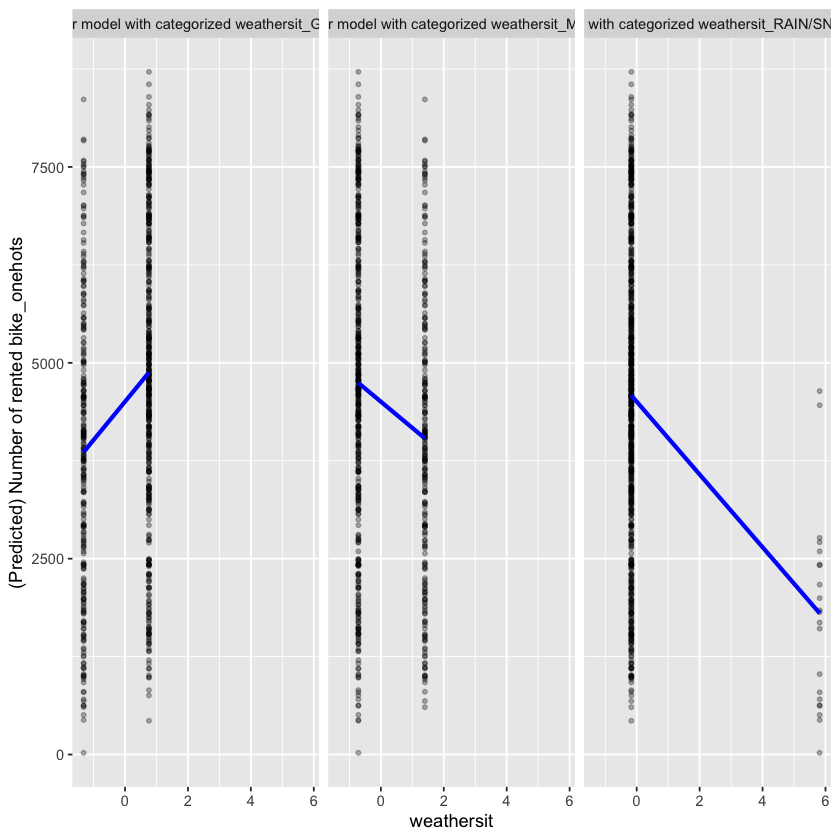

In [15]:
bike_onehot.plt = bike_onehot

bike_onehot.plt$cat.weathersit_GOOD = cut(bike_onehot$weathersit_GOOD, breaks = seq(from = min(bike_onehot$weathersit_GOOD), to = max(bike_onehot$weathersit_GOOD), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_GOOD, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weathersit_GOOD = predict(mod.simpel)
bike_onehot.plt$cat.weathersit_MISTY = cut(bike_onehot$weathersit_MISTY, breaks = seq(from = min(bike_onehot$weathersit_MISTY), to = max(bike_onehot$weathersit_MISTY), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_MISTY, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weathersit_MISTY = predict(mod.simpel)
bike_onehot.plt$cat.weathersit_BAD = cut(bike_onehot$weathersit_BAD, breaks = seq(from = min(bike_onehot$weathersit_BAD), to = max(bike_onehot$weathersit_BAD), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_BAD, data = bike_onehot.plt)
bike_onehot.plt$pred.cat.weathersit_BAD = predict(mod.simpel)

a = bike_onehot.plt[, c("pred.cat.weathersit_GOOD", "pred.cat.weathersit_MISTY", "pred.cat.weathersit_BAD"), with=FALSE]
bike_onehot.plt = data.table::melt(a, measure.vars = c("pred.cat.weathersit_GOOD", "pred.cat.weathersit_MISTY", "pred.cat.weathersit_BAD"), variable.name = "variable", value.name = "value")
v_season_SPRING = vector()
v_season_SPRING = c(v_season_SPRING, bike_onehot$weathersit_GOOD, bike_onehot$weathersit_MISTY, bike_onehot$weathersit_BAD)
bike_onehot.plt$season_SPRING = v_season_SPRING
bike_onehot.plt$cnt = rep(bike_onehot$cnt, times = 3)

model.type = c(
    pred.cat.weathersit_GOOD = "Linear model with categorized weathersit_GOOD",
    pred.cat.weathersit_MISTY = "Linear model with categorized weathersit_MISTY",
    pred.cat.weathersit_BAD = "Linear model with categorized weathersit_RAIN/SNOW/STORM"
)

print(ggplot(bike_onehot.plt) + 
  geom_point(aes(x = season_SPRING, y = cnt), size = 1 , alpha = 0.3)  + 
  geom_line(aes(x = season_SPRING, y = value), size = 1.2, color = "blue") + 
  facet_wrap("variable", labeller = labeller(variable = model.type)) + 
  scale_x_continuous("weathersit") + 
  scale_y_continuous("(Predicted) Number of rented bike_onehots"))


In [16]:
bike_onehot.plt = bike_onehot

newd = bike_onehot[,'weathersit_GOOD']
bike_onehot.plt$cat.weathersit_GOOD = cut(bike_onehot$weathersit_GOOD, breaks = seq(from = min(bike_onehot$weathersit_GOOD), to = max(bike_onehot$weathersit_GOOD), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_GOOD, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weathersit_GOOD = vector()
for(j in 1:length(Xp)){
    Weight_local_weathersit_GOOD = Xp[j] - mean(bike_onehot$cnt)
    Weight_weathersit_GOOD = c(Weight_weathersit_GOOD, Weight_local_weathersit_GOOD)
}

newd = bike_onehot[,'weathersit_MISTY']
bike_onehot.plt$cat.weathersit_MISTY = cut(bike_onehot$weathersit_MISTY, breaks = seq(from = min(bike_onehot$weathersit_MISTY), to = max(bike_onehot$weathersit_MISTY), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_MISTY, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weathersit_MISTY = vector()
for(j in 1:length(Xp)){
    Weight_local_weathersit_MISTY = Xp[j] - mean(bike_onehot$cnt)
    Weight_weathersit_MISTY = c(Weight_weathersit_MISTY, Weight_local_weathersit_MISTY)
}

newd = bike_onehot[,'weathersit_BAD']
bike_onehot.plt$cat.weathersit_BAD = cut(bike_onehot$weathersit_BAD, breaks = seq(from = min(bike_onehot$weathersit_BAD), to = max(bike_onehot$weathersit_BAD), length.out = 10), include.lowest = TRUE)
mod.simpel = lm(cnt ~ cat.weathersit_BAD, data = bike_onehot.plt)
Xp <- predict(mod.simpel)
coef_ <- coef(mod.simpel)
coef_ <- data.table(coef_)
Weight_weathersit_BAD = vector()
for(j in 1:length(Xp)){
    Weight_local_weathersit_BAD = Xp[j] - mean(bike_onehot$cnt)
    Weight_weathersit_BAD = c(Weight_weathersit_BAD, Weight_local_weathersit_BAD)
}

Weight_weathersit_GOOD = data.frame(Weight_weathersit_GOOD)
Weight_weathersit_MISTY = data.frame(Weight_weathersit_MISTY)
Weight_weathersit_BAD = data.frame(Weight_weathersit_BAD)

final = cbind(Weight_weathersit_GOOD, Weight_weathersit_MISTY, Weight_weathersit_BAD)
final

,Weight_weathersit_GOOD,Weight_weathersit_MISTY,Weight_weathersit_BAD
,<dbl>,<dbl>,<dbl>
1,-643.4272,-468.4865,79.8906
2,-643.4272,-468.4865,79.8906
3,372.4373,239.0830,79.8906
4,372.4373,239.0830,79.8906
5,372.4373,239.0830,79.8906
6,372.4373,239.0830,79.8906
7,-643.4272,-468.4865,79.8906
8,-643.4272,-468.4865,79.8906
9,372.4373,239.0830,79.8906


# 2.3.4 Work out the final label

In [17]:
final = vector()
for(j in 1:length(Xp)){
    local_sum_weight = mean(bike$cnt) + 
    Weight_X0[1,j] + 
    Weight_X1[1,j] + 
    Weight_days_since_2011[1,j] + 
    Weight_weekday_SUN[j,1] + Weight_weekday_MON[j,1] + Weight_weekday_TUE[j,1] + Weight_weekday_WED[j,1] + Weight_weekday_THU[j,1] + Weight_weekday_FRI[j,1] + Weight_weekday_SAT[j,1] + 
    Weight_holiday_HOLIDAY[j,1] + 
    Weight_weathersit_GOOD[j,1] + Weight_weathersit_MISTY[j,1] + Weight_weathersit_BAD[j,1]
    
    final = c(final, local_sum_weight)
}
final = data.frame(final)
final

final
<dbl>
67.04105
-716.08674
1510.94260
2198.58208
2250.07199
2707.49768
768.35070
306.97890
584.66637


In [18]:
bike_final <- subset(bike, select = -c(cnt))
y1 = bike[,'cnt']
y2 = final
bike_final = cbind(bike_final, y1)
bike_final = cbind(bike_final, y2)
bike_final

X0,X1,days_since_2011,holiday_HOLIDAY,weekday_SUN,weekday_MON,weekday_TUE,weekday_WED,weekday_THU,weekday_FRI,weekday_SAT,weathersit_GOOD,weathersit_MISTY,weathersit_BAD,cnt,final
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
-1.15828547,0.6097238,-1.729683,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,2.4417012,-1.3143865,1.3998265,-0.171981,985,67.04105
0.19126442,0.8688325,-1.724944,-0.171981,2.4417012,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,-1.3143865,1.3998265,-0.171981,801,-716.08674
1.47495816,-0.4190613,-1.720205,-0.171981,-0.4095505,2.4417012,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1349,1510.94260
-0.08955295,-0.4617479,-1.715466,-0.171981,-0.4095505,-0.4095505,2.4553709,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1562,2198.58208
0.91583586,-0.9813234,-1.710728,-0.171981,-0.4095505,-0.4095505,-0.4072704,2.4553709,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1600,2250.07199
-0.37679539,-1.4661144,-1.705989,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,2.4553709,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,1606,2707.49768
0.44317821,-0.8405395,-1.701250,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,2.4553709,-0.4095505,-1.3143865,1.3998265,-0.171981,1510,768.35070
1.15417767,0.2394548,-1.696511,-0.171981,-0.4095505,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,2.4417012,-1.3143865,1.3998265,-0.171981,959,306.97890
2.52798304,0.6031023,-1.691772,-0.171981,2.4417012,-0.4095505,-0.4072704,-0.4072704,-0.4072704,-0.4072704,-0.4095505,0.7608112,-0.7143743,-0.171981,822,584.66637


In [19]:
write.csv(bike_final, "./DataSet/bike_final.csv")

# 2.3.5 Importance Calculation

In [20]:
work_out_local_L2distance = function(j, number=10){
    
    Weight_X0_local = Weight_X0[1,j]
    Weight_X1_local = Weight_X1[1,j]
    Weight_hum = 0
    Weight_windspeed = 0
    
    Weight_hum = bike_original[1,2] / sqrt((bike_original[1,2])^2 + (bike_original[1,3])^2) * Weight_X0_local + 
                 bike_original[2,2] / sqrt((bike_original[2,2])^2 + (bike_original[2,3])^2) * Weight_X1_local
    Weight_windspeed = bike_original[1,3] / sqrt((bike_original[1,2])^2 + (bike_original[1,3])^2) * Weight_X0_local + 
                       bike_original[2,3] / sqrt((bike_original[2,2])^2 + (bike_original[2,3])^2) * Weight_X1_local
    
    local_final = vector()
    local_final = c(local_final,
                        Weight_hum , 
                        Weight_windspeed , 
                        Weight_days_since_2011[1,j] ,
                        Weight_weekday_SUN[j,1], Weight_weekday_MON[j,1], Weight_weekday_TUE[j,1], Weight_weekday_WED[j,1], Weight_weekday_THU[j,1], Weight_weekday_FRI[j,1], Weight_weekday_SAT[j,1], 
                        Weight_holiday_HOLIDAY[j,1], 
                        Weight_weathersit_GOOD[j,1], Weight_weathersit_MISTY[j,1], Weight_weathersit_BAD[j,1]
                    
                   )
    
    local_final = local_final / mean(bike$cnt)
    local_final_abs = abs(local_final)
    
    local_final = data.frame(local_final)
    local_final_abs = data.frame(local_final_abs)
    
    feature_name = col_bike
    
    return_df = cbind(feature_name, local_final, local_final_abs)
    return_df = return_df[order(return_df[,3],decreasing=T),]
    return_df
    
    return_df = return_df[1:number, ]
    return_df <- subset(return_df, select = -c(local_final_abs))
    rownames(return_df) <- 1:nrow(return_df)
    return_df$feature_name<- factor(return_df$feature_name, levels = return_df$feature_name, ordered = TRUE)
    
    return(return_df)
}

In [21]:
bike_original = read.csv(sprintf('./DataSet/pca_components.csv'), stringsAsFactors = FALSE)
col_bike = colnames(bike_original)
col_bike = data.frame(col_bike)
col_bike <- col_bike[-1,]

bike_feature <- subset(bike, select = -c(X0, X1, cnt))
feature_name = colnames(bike_feature)

col_bike = c(col_bike, feature_name)

sample(731,10)  
=> 204, 244, 553, 275, 713, 114, 718, 32, 692, 552

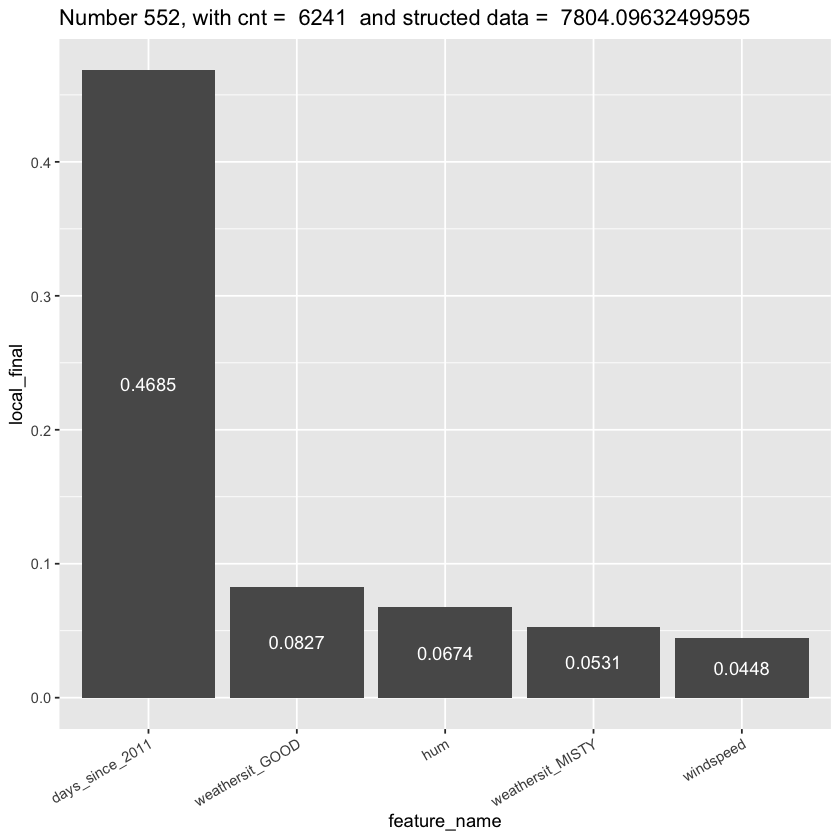

In [22]:
#Number 552
df_1 = work_out_local_L2distance(552,5)
ggplot(data=df_1,mapping=aes(x = feature_name, y = local_final, group=factor(1))) +
  ggtitle(paste("Number 552, with cnt = " , bike_final$cnt[552] , ' and structed data = ' , bike_final$final[552])) + 
  geom_bar(stat="identity") +
  geom_text(aes(label = round(local_final,4)), position=position_stack(vjust=0.5), colour = 'white', show.legend = TRUE) +
  theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1))


In [23]:
column_name <- names(bike)
df_final = data.table(column_name)
df_final <- transform(df_final, count = 0)
df_final[1,1] = 'hum'
df_final[2,1] = 'windspeed'
df_final = df_final[-which(df_final$column_name=='cnt'),]

for(j in 1:length(Xp[])){
    df_1 = work_out_local_L2distance(j,5)
    for(i in 1:length(df_1[,1])){
        name = df_1[i,1]
        df_final[which(df_final$column_name==name),2] = df_final[which(df_final$column_name==name),2] + 1
    }
}

df_final = df_final[order(df_final[,2],decreasing=T),]
df_final

column_name,count
<chr>,<dbl>
weathersit_GOOD,731
weathersit_MISTY,706
days_since_2011,693
windspeed,603
hum,486
weathersit_BAD,126
holiday_HOLIDAY,99
weekday_THU,66
weekday_WED,63
